**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial import distance_matrix
from scipy.spatial.distance import minkowski
from sklearn.neighbors import KDTree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.metrics.pairwise import pairwise_distances

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        self.X_train = X.copy()
        self.y_train = y.copy()
                         
    def predict(self, X):
        self.X_test = X.copy()
        if self.algorithm == 'brute':
            return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=self.y_train[np.argpartition(pairwise_distances(self.X_test, self.X_train), 2, axis=1)[:, :self.n_neighbors]])
        elif self.algorithm == 'kd_tree':
            tree = KDTree(np.vstack([self.X_test, self.X_train]))
            return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=self.y_train[tree.query(self.X_test, k=(self.n_neighbors + 1))[1][:, 1:] - self.X_test.shape[0]])

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

Wall time: 970 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [10]:
%time clf.predict(X_test)

Wall time: 1.99 ms


array([1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0])

In [11]:
%time my_clf.predict(X_test)

Wall time: 1.99 ms


array([1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0], dtype=int64)

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

Wall time: 7.98 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [16]:
%time clf.predict(X_test)

Wall time: 8.98 ms


array([2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0])

In [17]:
%time my_clf.predict(X_test)

Wall time: 970 µs


array([2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0], dtype=int64)

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
kf = KFold(n_splits=3)

In [23]:
class MyNewKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        self.X_train = X.copy()
        self.y_train = y.copy()
                         
    def predict(self, X):
        self.X_test = X.copy()
        if self.algorithm == 'brute':
            return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=self.y_train[np.argpartition(pairwise_distances(self.X_test, self.X_train, metric='cosine'), 2, axis=1)[:, :self.n_neighbors]])
        elif self.algorithm == 'kd_tree':
            tree = KDTree(np.vstack([self.X_test, self.X_train]))
            return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=self.y_train[tree.query(self.X_test, k=(self.n_neighbors + 1))[1][:, 1:] - self.X_test.shape[0]])

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [24]:
ks = np.zeros((14, 3))
for k in range(1, 15):
    i = 0
    my_newclf = MyNewKNeighborsClassifier(n_neighbors=k, algorithm='brute')
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = target[train_index], target[test_index]
        my_newclf.fit(X_train, y_train)
        ks[k - 1][i] = accuracy_score(y_test, my_newclf.predict(X_test))
        i += 1
print("k = ", np.argmax(ks.mean(axis=1)) + 1)
np.max(ks.mean(axis=1))

k =  1


0.5958995830489591

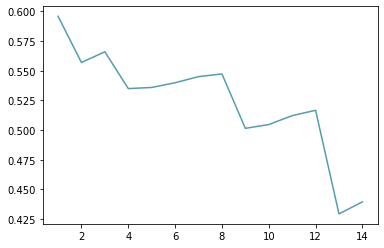

In [25]:
plt.plot(np.arange(1, 15), ks.mean(axis=1), color = '#539caf')

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [26]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [27]:
Z = vectorizer.transform(newsgroups['data'])

In [28]:
my_clf1 = MyNewKNeighborsClassifier(n_neighbors=1, algorithm='brute')
my_clf1.fit(X, target)
accuracy_score(newsgroups['target'], my_clf1.predict(Z))

0.5088953797132236